In [0]:
import torch
print(torch.__version__)

1.4.0


In [0]:
!pip install -q folium==0.2.1
!pip install -q imgaug==0.2.5
!pip install -q pandas
!pip install -q numpy==1.16.0

     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 563kB 2.8MB/s 
     |████████████████████████████████| 17.3MB 1.3MB/s 


In [0]:
!pip install -q pandas
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag

!pip install -q Pillow==4.3.0
!pip install -q PIL
!pip install -q image
import PIL

#%reload_ext autoreload        <------------— comment out 
#%autoreload 0                 <------------— comment out
%matplotlib inline

!pip install --no-cache-dir -I pillow

def register_extension(id, extension):
    PIL.Image.EXTENSION[extension.lower()] = id.upper()
PIL.Image.register_extension = register_extension
def register_extensions(id, extensions):
    for extension in extensions:
        register_extension(id, extension)
PIL.Image.register_extensions = register_extensions

from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

     |████████████████████████████████| 5.8MB 2.5MB/s 
     |████████████████████████████████| 112kB 42.7MB/s 
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
     |████████████████████████████████| 2.1MB 2.8MB/s 


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive 
!google-drive-ocamlfuse drive

import os
#os.listdir('/content/drive/AMD/CNV')
#trainDir = '/content/drive/My Drive/AMD/CNV'

from google.colab import drive
drive.mount('/content/drive')
data = "/content/drive/My Drive/Plant Disease/PlantVillage"

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.19-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
import torch
import helper
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models

from torchvision import datasets ,transforms


#Changning the transform of the data-
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),
                                     # transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

transform_test = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),
                                     # transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

# choose the training and test datasets
train_data = datasets.ImageFolder(data+"/train", transform=transform_train)
test_data = datasets.ImageFolder(data+"/val", transform = transform_test)
#n_classes = test_data.shape[1]
n_classes = len(test_data.classes)
print(n_classes)

batch_size = 16

dataloader_train = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True, num_workers=2)
dataloader_test = torch.utils.data.DataLoader(test_data, batch_size, num_workers=2)

39


In [0]:
import matplotlib.pyplot as plt
import numpy as np

norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

def imshow_numpy(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.grid(False)
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array(norm_mean)
    std = np.array(norm_std)
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

torch.Size([16, 3, 224, 224])


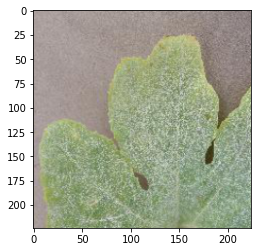

In [0]:
images, labels = next(iter(dataloader_train))
imshow_numpy(images[0].numpy())
print(images.shape)

In [0]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
import torch
import helper
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
model = models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Epoch: 1 	Training Loss: 2.070873 	Validation Loss: 0.951872
Validation loss decreased (inf --> 0.951872).  Saving model ...
tensor([[ 13.,   3.,   5.,  ...,   0.,   2.,   0.],
        [  1.,   9.,   1.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [ 12.,  11.,   0.,  ...,  37., 532.,   3.],
        [  5.,   1.,   0.,  ...,   0.,   3., 363.]])
Class 0
TP 13.0, TN 54628.0, FP 24.0, FN 623.0
Recall = 0.020440252497792244
Precision = 0.3513513505458832
F1 Score = 0.038632988929748535
Class 1
TP 9.0, TN 54654.0, FP 9.0, FN 616.0
Recall = 0.014399999752640724
Precision = 0.5
F1 Score = 0.02799377776682377
Class 2
TP 0.0, TN 55007.0, FP 0.0, FN 281.0
Recall = 0.0
Precision = nan
F1 Score = nan
Class 3
TP 712.0, TN 53104.0, FP 538.0, FN 934.0
Recall = 0.43256378173828125
Precision = 0.569599986076355
F1 Score = 0.4917127192020416
Class 4
TP 773.0, TN 53284.0, FP 502.0, FN 729.0
Recall = 0.

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f29695f4a58>>
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f29695f4a58>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    w.join()
    assert self._p

Epoch: 10 	Training Loss: 0.506494 	Validation Loss: 0.293875
Validation loss decreased (0.297105 --> 0.293875).  Saving model ...
tensor([[2.7560e+03, 1.2200e+02, 1.8300e+02,  ..., 5.0000e+00, 3.0000e+01,
         0.0000e+00],
        [1.5300e+02, 3.3460e+03, 1.0500e+02,  ..., 0.0000e+00, 1.7000e+01,
         0.0000e+00],
        [4.9000e+01, 4.1000e+01, 1.2260e+03,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        ...,
        [1.0000e+00, 3.0000e+00, 0.0000e+00,  ..., 1.4290e+03, 3.5000e+01,
         0.0000e+00],
        [9.8000e+01, 8.1000e+01, 2.0000e+00,  ..., 1.7100e+02, 1.1925e+04,
         6.0000e+00],
        [2.6000e+01, 8.0000e+00, 8.0000e+00,  ..., 0.0000e+00, 1.9000e+01,
         6.4510e+03]])
Class 0
TP 2756.0, TN 545225.0, FP 1295.0, FN 3604.0
Recall = 0.4333333373069763
Precision = 0.6803258657455444
F1 Score = 0.5294400453567505
Class 1
TP 3346.0, TN 545527.0, FP 1103.0, FN 2904.0
Recall = 0.5353599786758423
Precision = 0.7520791292190552
F1 Score = 0.625478

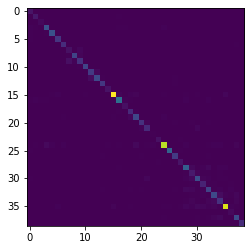

In [0]:
import torch
import helper
import numpy as np
import pandas as pd
from torch import nn
import seaborn as sn
from torch import optim
from itertools import cycle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import svm, datasets
import torchvision.models as models
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = models.densenet121(pretrained=True)

for param in model.parameters():
    param.requires_grad = True

model.classifier = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(512,128),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(128,39),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr = 0.00008)

model.to(device); 
                
epochs = 10
valid_loss_min = np.Inf # track change in validation loss
#steps = 0
#print_every = 5

#output = torch.randn(batch_size, n_classes) # refer to output after softmax
target = torch.randint(0, n_classes, (batch_size,)) # labels

def confusion_matrix(preds, labels, conf_matrix, title='Confusion matrix', cmap=plt.cm.Blues):
    preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        conf_matrix[p, t] += 1

    #print(conf_matrix)
    #plt.imshow(conf_matrix)
    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        Recall = (TP[c] / (TP[c]+FN))
        precision = (TP[c] / (TP[c]+FP))
        f1 = (2 * ((precision * Recall)/(precision + Recall)))

        #print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
        #print('Sensitivity = {}'.format(sensitivity))
        #print('Specificity = {}'.format(specificity))
            
    return conf_matrix

conf_matrix = torch.zeros(n_classes, n_classes)

for epoch in range(1, epochs+1):
  
  train_loss = 0
  model.train()
  import warnings
  warnings.filterwarnings("ignore", category=UserWarning)
  for images, labels in dataloader_train:
    
    #steps += 1
    images, labels = images.to(device), labels.to(device)
    
    optimizer.zero_grad()
    
    output = model.forward(images)
    conf_matrix = confusion_matrix(output, labels, conf_matrix)
    p = torch.nn.functional.softmax(output, dim=1)
    prediction = torch.argmax(p, dim=1)
    #loss = torch.nn.functional.nll_loss(torch.log(p), y)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    train_loss += loss.item()*images.size(0)
    
    #vis.line(X=torch.ones((1,1)).cpu()*epoch, Y=torch.Tensor([train_loss]).unsqueeze(0).cpu(),win=loss_window,update='append')    
    
  #if steps % print_every == 0:
  valid_loss = 0
  accuracy = 0
  model.eval()
  #print(conf_matrix)
  TP = conf_matrix.diag()
  for c in range(n_classes):
      idx = torch.ones(n_classes).byte()
      idx[c] = 0
      TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
      FP = conf_matrix[c, idx].sum()
      FN = conf_matrix[idx, c].sum()

      Recall = (TP[c] / (TP[c]+FN))
      precision = (TP[c] / (TP[c]+FP))
      f1 = (2 * ((precision * Recall)/(precision + Recall)))
      
      #print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
      #print('Sensitivity = {}'.format(sensitivity))
      #print('Specificity = {}'.format(specificity))
    #return TP[C], TN, FP, FN, sensitivity, specificity
  
  for images, labels in dataloader_test:
    optimizer.zero_grad()
    with torch.no_grad():
       
      images, labels = images.to(device), labels.to(device)
      #if train_on_gpu:
      #      images, labels = data.cuda(), target.cuda()

      output = model.forward(images)
      conf_matrix = confusion_matrix(output, labels, conf_matrix)
      p = torch.nn.functional.softmax(output, dim=1)
      prediction = torch.argmax(p, dim=1)
      loss = criterion(output, labels)
          
      valid_loss += loss.item()*images.size(0)
      
      ps = torch.exp(output)
         
      top_p, top_class = ps.topk(1, dim = 1)
      equals = top_class == labels.view(*top_class.shape)
      accuracy += torch.mean(equals.type(torch.FloatTensor))
      
  # calculate average losses
  train_loss = train_loss/len(dataloader_train.dataset)
  valid_loss = valid_loss/len(dataloader_test.dataset)
        
  # print training/validation statistics 
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
  # save model if validation loss has decreased
  if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
  
  print(conf_matrix)
  plt.imshow(conf_matrix)
  TP = conf_matrix.diag()
  for c in range(n_classes):
      idx = torch.ones(n_classes).byte()
      idx[c] = 0
      TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
      FP = conf_matrix[c, idx].sum()
      FN = conf_matrix[idx, c].sum()

      Recall = (TP[c] / (TP[c]+FN))
      precision = (TP[c] / (TP[c]+FP))
      f1 = (2 * ((precision * Recall)/(precision + Recall)))
      
      print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
      print('Recall = {}'.format(Recall))
      print('Precision = {}'.format(precision))
      print('F1 Score = {}'.format(f1))
  #print("Epoch: {}/{} " .format(epoch+1, epochs))
  #print("Train loss: {:.4f}.. " .format(running_loss/len(dataloader_train)))
  #print("Valid loss: {:.4f}.. " .format(valid_loss/len(dataloader_test)))
  print("Accuracy: {:.4f}.. " .format(accuracy/len(dataloader_test)))
  model.train()